In [1]:
import matplotlib.backends.backend_pdf as pdf_backend
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Salary,Experience,Technology,Java,Backend,QA,Manual,Automation,.NET,Web dev,...,Spring,Report automation,Data Scientist,Baze,Blockchain,SAP consultatnt,Unity dev,Cyber Security,Penetration tester,Data Engineer
0,550,0.0,.NET,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,4.0,Java Backend,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2600,6.0,"QA automation (JS, Java)",1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500,4.0,.NET Web Dev,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1200,2.0,Java Backend,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
value_counts = df.apply(pd.Series.value_counts)
columns_to_drop = value_counts.columns[value_counts.loc[1] == 1]
df = df.drop(columns=columns_to_drop)

In [4]:
def subset(column_name):
    return df[df[column_name] == 1].reset_index(drop=True)

In [5]:
pdf = pdf_backend.PdfPages('generated_images.pdf')

def ploting(pdf, data_frame, kolona):
    x = data_frame['Experience']
    y = data_frame['Salary']
    slope, intercept = np.polyfit(x, y, 1)
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color='red', label='Line of Best Fit')
    plt.xlabel('Experience in Years')
    plt.ylabel('Salary in Euros')
    plt.title(f'Technology: {kolona}')
    plt.legend()
    pdf.savefig()
    plt.show()
    plt.close()

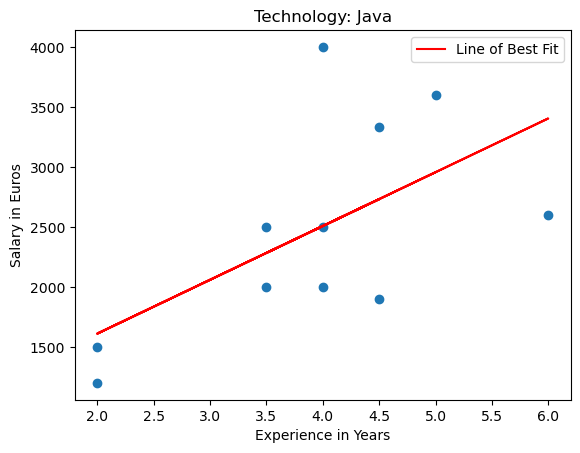

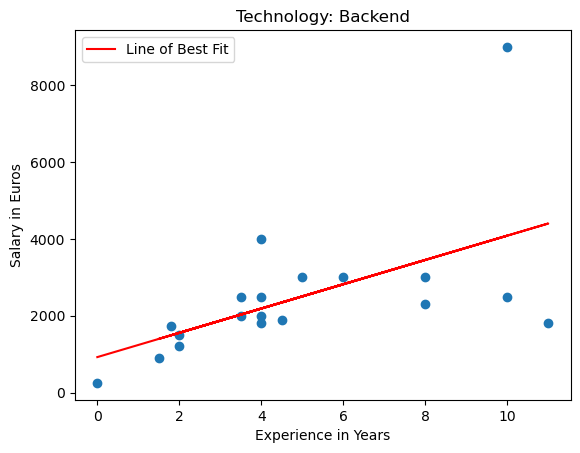

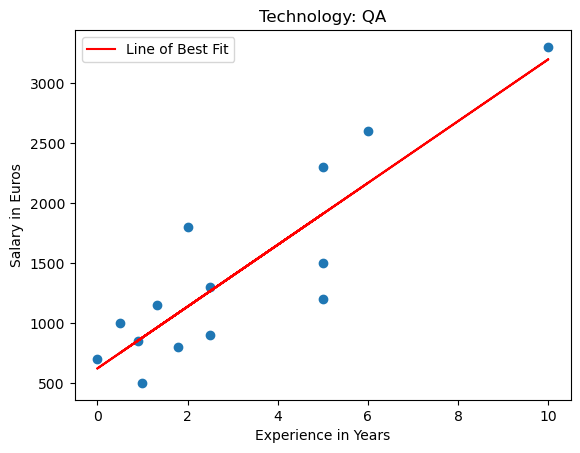

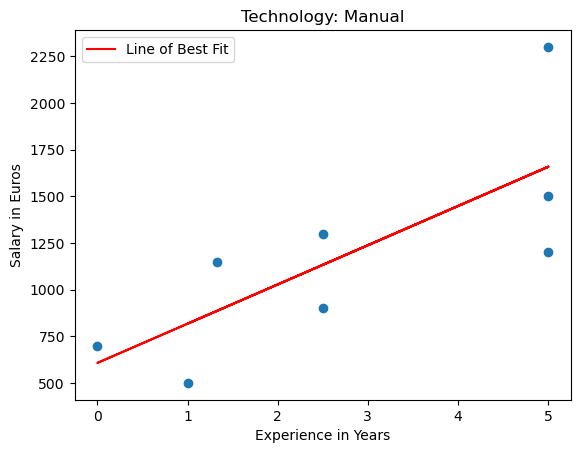

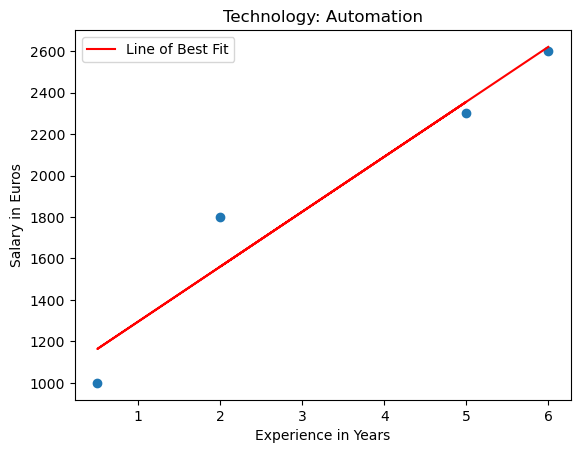

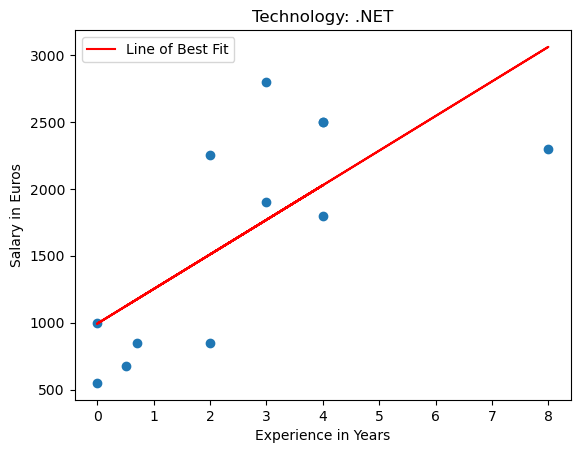

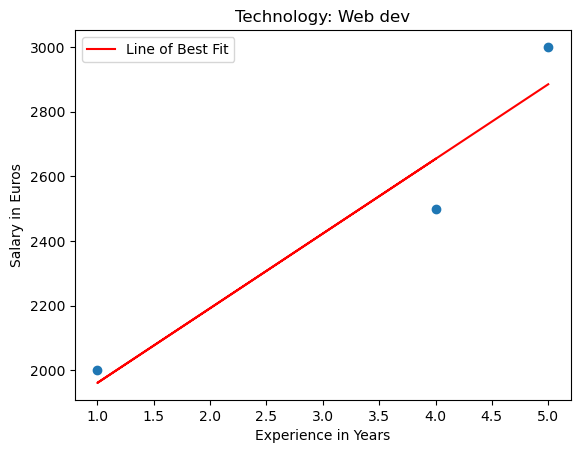

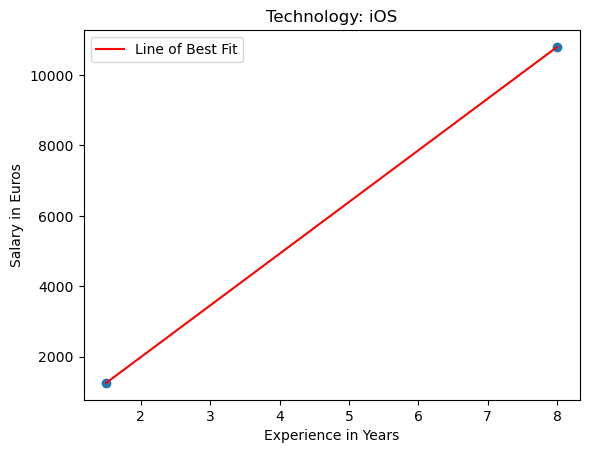

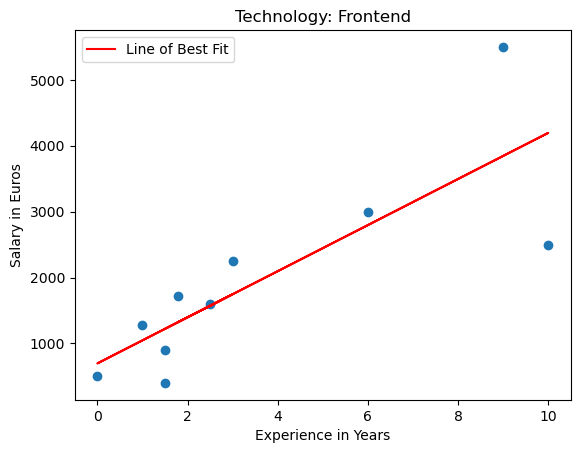

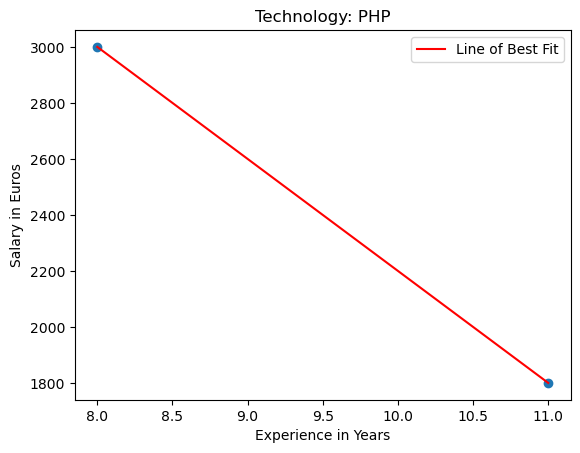

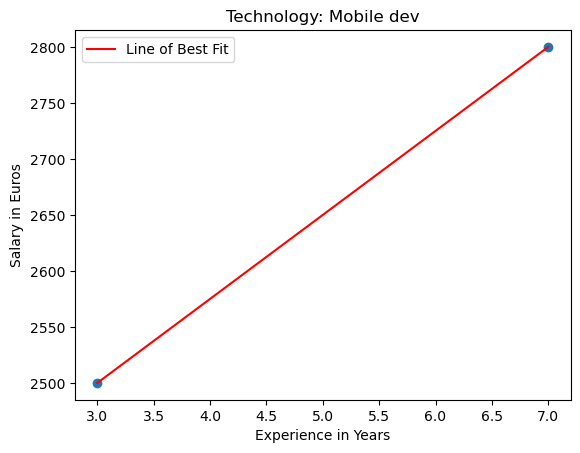

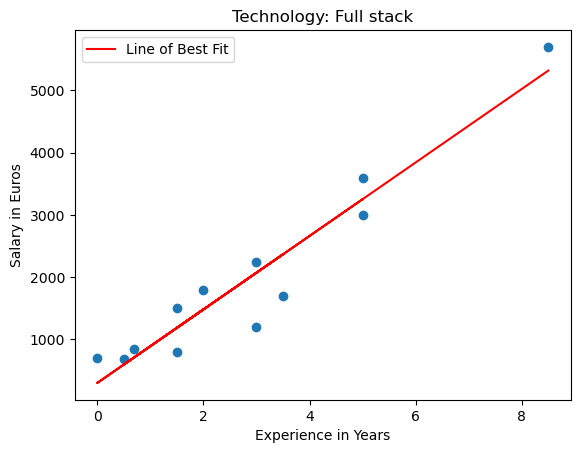

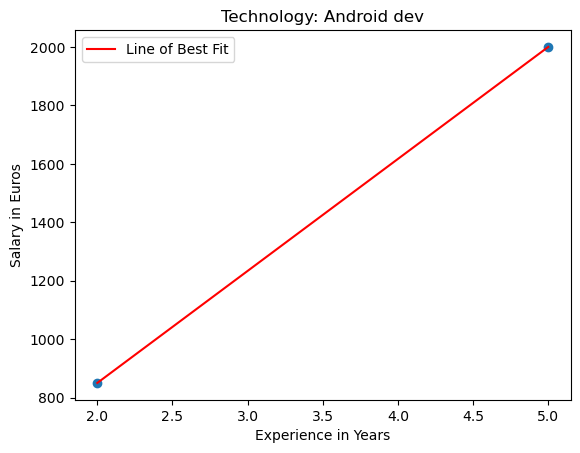

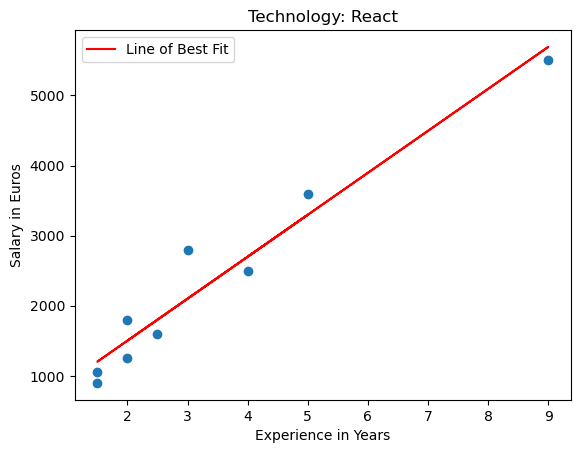

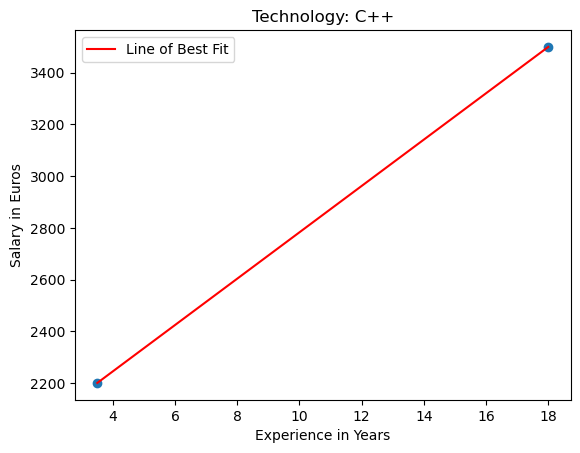

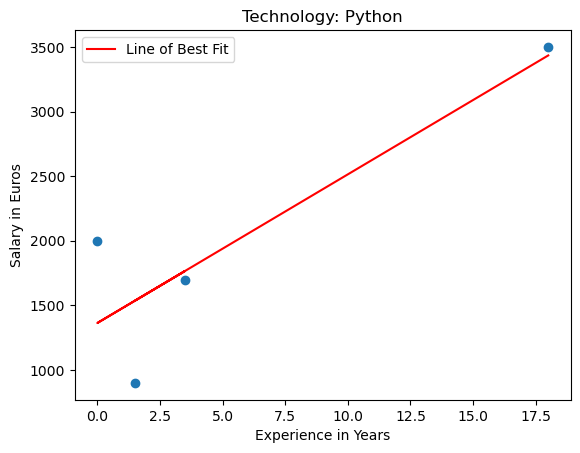

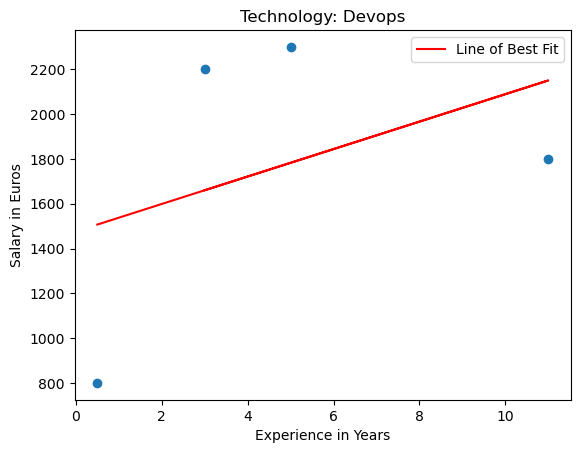

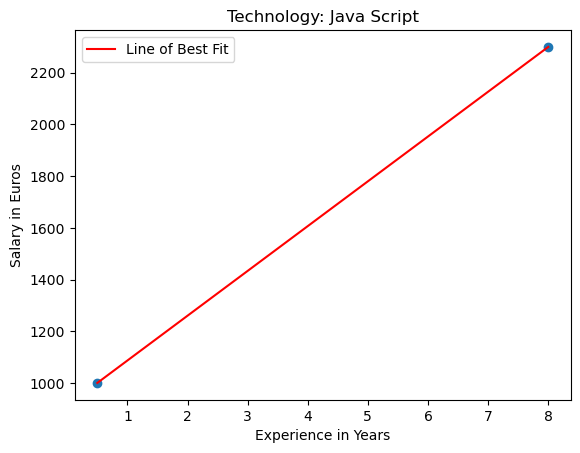

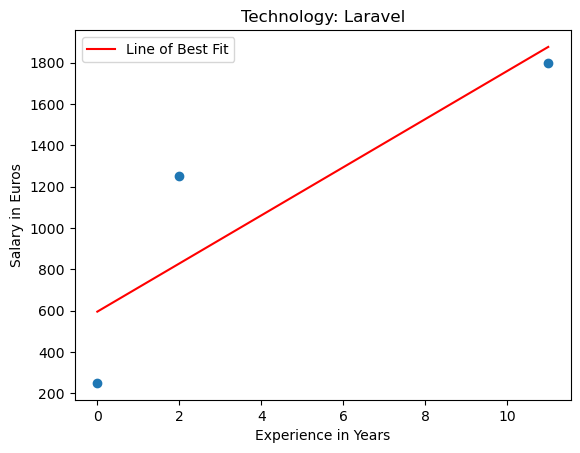

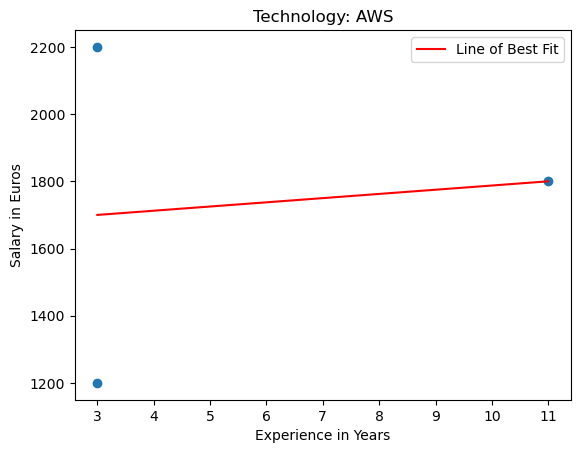

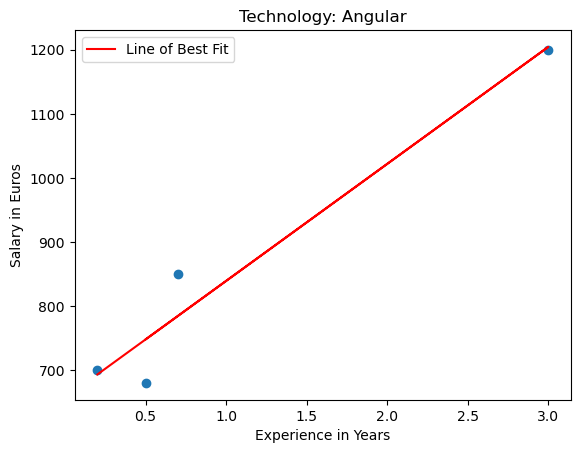

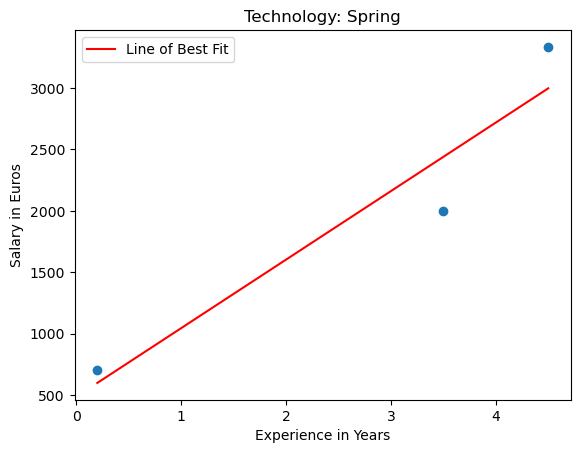

In [6]:
column_names = df.columns.tolist()
for kolona in column_names[3:]:
    ploting(pdf, subset(kolona), kolona)

pdf.close()